# Topics - Easy Topic Modeling in Python

This notebook introduces a workflow using the text mining technique **Topic Modeling**. The Python library [**gensim**](http://radimrehurek.com/gensim/), an open-source vector space modeling and topic modeling toolkit, offers one reliable way to compute the abstract topics of a collection of documents using [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation), a generative statistical model. 

"Topic models are algorithms for discovering the main themes that pervade a large and otherwise unstructured collection of documents. Topic models can organize the collection according to the discovered themes." ([Blei 2012: 77](https://www.cs.princeton.edu/~blei/papers/Blei2012.pdf))

Some parts of the following code are heavily inspired by the [gensim tutorial](https://radimrehurek.com/gensim/tutorial.html).

### 1. Prerequisites

First of all you have to import several pre-processing functions from the [cophi-toolbox](https://github.com/thvitt/cophi-toolbox) and the script **model_creation.py** to create and visualize the LDA model.

As a first step, simply run the following statement. The first two lines import the mentioned modules, the last line makes sure that graphs (created by matplotlib) can be displayed within your Jupyter notebook.

In [1]:
from cophi_toolbox.dariah import topics as pre
import model_creation as post
%matplotlib inline

### 2. Reading documents 

Let's start by reading text files from a folder. The folder **corpus** within **Topics** contains a collection of short stories saved as [plain text](https://en.wikipedi.org/wiki/Plain_text). In case you have your own collection, feel free to set the variable `folder` to the respective path. Don't forget to add "`/*.txt`" at the end.

e. g. `folder = '/users/mycollection/*.txt'`

**Note**: Every file has to be saved as plain text.

In [2]:
folder = './corpus_txt/*.txt'

To use the first function `pre.readCorpus`, which reads and saves the content of every single document in a [list](https://docs.python.org/3/tutorial/datastructures.html), run the following statement:

In [3]:
documents = pre.readCorpus(folder)

Now let's store the file names as document labels in a separate list:

In [4]:
doc_labels = pre.docLabels(folder)
doc_labels

['Doyle_AScandalinBohemia',
 'Doyle_AStudyinScarlet',
 'Doyle_TheHoundoftheBaskervilles',
 'Doyle_TheSignoftheFour',
 'Howard_GodsoftheNorth',
 'Howard_SchadowsinZamboula',
 'Howard_ShadowsintheMoonlight',
 'Howard_TheDevilinIron',
 'Kipling_TheEndofthePassage',
 'Kipling_TheJungleBook',
 'Kipling_ThyServantaDog',
 'Lovecraft_AttheMountainofMadness',
 'Lovecraft_TheShunnedHouse',
 'Poe_EurekaAProsePoem',
 'Poe_TheCaskofAmontillado',
 'Poe_TheMasqueoftheRedDeath',
 'Poe_ThePurloinedLetter']

**Hint**: If you are interested in a single function, try using `help()` as shown here:

In [5]:
help(pre.docLabels)

Help on function docLabels in module cophi_toolbox.dariah.topics:

docLabels(path)
    Create a list of names (of the files) using paths and return a
    list.
    
    Args:
        path (str): Path/glob pattern of the text files to process.
    
    Author:
        DARIAH-DE



### 3. Preprocessing

To achieve a reliable result, the documents have to be pre-processed before the model can be created. 

Tokenization, also called word segmentation, is the process of finding word boundaries - in its simplest form, by using the blanks in-between words as delimiters. This is exactly what you'll be doing now using `pre.tokenize`.

In [6]:
texts = pre.tokenize(documents)

Now the hapax legomena have to be removed. A hapax legomenon is a single word that occurs only once in a text.

In [7]:
texts = pre.removeHapaxLeg(texts)

Let's finally remove the stopwords. Stopwords might occur a thousand times in one document, but will not be considered because of their semantic unimportance. Feel free to have a look at the exemplary stopwords lists in the folder **stopwords** within **helpful_stuff**.

Before removing the stopwords, make sure the parameter `stoplist` is set correctly to either 'en', 'de', 'es' or 'fr'.

In [8]:
texts = pre.removeStopWords(texts, stoplist = 'en')

### 4. Model creation

Create the LDA model, and if you are wondering: yes, this may take a while. `no_of_topics = 10` means ten topics will be created. In case you want twenty models or whatever to be created, just update the number.

The output offers a brief insight into what the function is actually doing.

In [9]:
no_of_topics = 10

gensim_output = post.gensimModel(texts, no_of_topics)

model = gensim_output[0]
dictionary = gensim_output[1]
corpus = gensim_output[2]
topics = gensim_output[3]

2016-10-31 14:40:19,496 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2016-10-31 14:40:19,525 : INFO : built Dictionary(514 unique tokens: ['majesty', 'adler', 'answered', 'call', 'street']...) from 17 documents (total 35384 corpus positions)
2016-10-31 14:40:19,545 : INFO : using symmetric alpha at 0.1
2016-10-31 14:40:19,546 : INFO : using symmetric eta at 0.1
2016-10-31 14:40:19,547 : INFO : using serial LDA version on this node
2016-10-31 14:40:19,604 : INFO : running online LDA training, 10 topics, 10 passes over the supplied corpus of 17 documents, updating model once every 17 documents, evaluating perplexity every 17 documents, iterating 50x with a convergence threshold of 0.001000
2016-10-31 14:40:20,103 : INFO : -6.972 per-word bound, 125.5 perplexity estimate based on a held-out corpus of 17 documents with 35384 words
2016-10-31 14:40:20,104 : INFO : PROGRESS: pass 0, at document #17/17
2016-10-31 14:40:20,196 : INFO : topic #7 (0.100): 0.032*man + 0.026*will

Now, create topic labels using the LDA model.

In [10]:
topic_labels = post.topicLabels(model, no_of_topics)

Let's have a look at the created topics.

In [11]:
model.show_topics(num_topics = 5)

[(5,
  '0.024*holmes + 0.022*will + 0.021*man + 0.013*well + 0.011*hand + 0.010*night + 0.009*good + 0.009*matter + 0.009*room + 0.008*door'),
 (3,
  '0.038*man + 0.036*will + 0.028*head + 0.025*time + 0.018*good + 0.017*night + 0.017*men + 0.017*long + 0.016*told + 0.015*things'),
 (0,
  '0.005*man + 0.004*well + 0.004*hand + 0.004*will + 0.004*great + 0.004*time + 0.004*long + 0.003*good + 0.003*thought + 0.003*black'),
 (4,
  '0.006*man + 0.006*will + 0.005*holmes + 0.004*time + 0.004*good + 0.004*well + 0.004*night + 0.004*small + 0.004*great + 0.003*day'),
 (2,
  '0.031*great + 0.020*things + 0.020*time + 0.018*house + 0.017*course + 0.017*years + 0.017*long + 0.016*thing + 0.015*left + 0.013*thought')]

Saving the gensim output in the folder **out** within **Topics** is recommended, but not necessary to visualize the model:

In [12]:
post.saveGensimModel(model, corpus, dictionary, no_of_topics, doc_labels)

2016-10-31 14:40:26,025 : INFO : saving Dictionary object under out/corpus.dict, separately None
2016-10-31 14:40:26,026 : INFO : storing corpus in Matrix Market format to out/corpus.mm
2016-10-31 14:40:26,028 : INFO : saving sparse matrix to out/corpus.mm
2016-10-31 14:40:26,029 : INFO : PROGRESS: saving document #0
2016-10-31 14:40:26,048 : INFO : saved 17x514 matrix, density=52.472% (4585/8738)
2016-10-31 14:40:26,049 : INFO : saving MmCorpus index to out/corpus.mm.index
2016-10-31 14:40:26,050 : INFO : saving LdaState object under out/corpus.lda.state, separately None
2016-10-31 14:40:26,052 : INFO : saving LdaModel object under out/corpus.lda, separately None
2016-10-31 14:40:26,053 : INFO : not storing attribute dispatcher
2016-10-31 14:40:26,054 : INFO : not storing attribute state


### 5. The document-topic matrix

As one of the last steps you will create a doc-topic matrix from the gensim objects. The doc-topic matrix essentially describes the frequency of topics that occur in your collection of documents. 

In [13]:
doc_topic = post.gensim_to_dtm(model, corpus, no_of_topics)

### 6. Document-topic heatmap

`post.docTopHeatmap` finally visualizes the model by displaying a [heatmap](https://en.wikipedia.org/wiki/Heat_map).

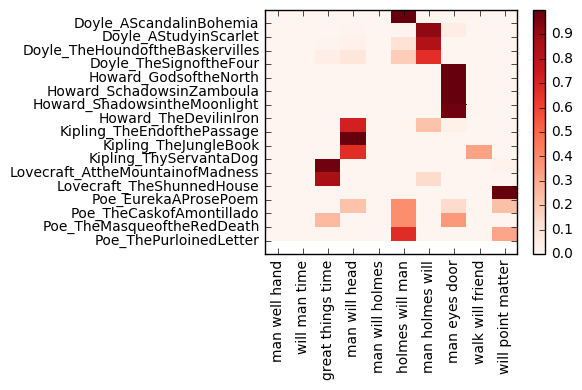

In [14]:
post.docTopHeatmap(doc_topic, doc_labels, topic_labels)